# Assignment 1 - $k$-nearest neighbor
## Task 1 - Visualization
Visualize the data stored in `DataSet1.csv`!

In [1]:
import numpy as np
from numpy.random import rand

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt

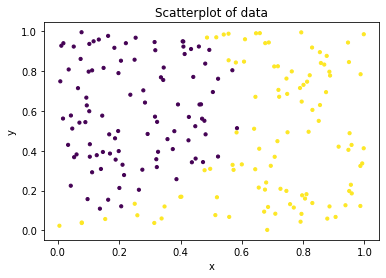

In [2]:
# read data
Z = np.genfromtxt('DataSet1.csv', delimiter=',')
X, y = Z[:,:-1], Z[:,-1]

# plot data
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)
plt.title("Scatterplot of data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Questions 
 - Why is $k$-nearest neighbor possibly a reasonable approach?

### Answers
 - As we can see in the plot above, the data is very well clustered; thus a $k$-nearest neighbor approach will yield very accurate predictions

## Task 2 - Training the model
Use k-nearest neighbor classifiers with $k \in \{1,3,5,...,47,49,51\}$. Either use the `kNeigbhors` function from `sklearn` or implement it on your own (bonus points!). In order to estimate the generalization error, use 10-fold cross validation. Visualize your results (plot $k$ vs. error rates).

In [3]:
def trainModel(data, classes, K, K_Fold=10, seed=0, method="default"):
    accuracies = []

    for k in K: 
        kf = KFold(n_splits=K_Fold, shuffle=True, random_state=seed)
        curr = []
        for train_index, test_index in kf.split(data):
            X_train, X_test = data[train_index], data[test_index]
            y_train, y_test = classes[train_index], classes[test_index]
            
            if method == "default":
                knnc = KNeighborsClassifier(n_neighbors=k)
            elif method == "my KNNC":
                knnc = KNearestNeighborClassifier(k)
            knnc.fit(X_train, y_train)
            
            y_pred = knnc.predict(X_test)
            curr.append(accuracy_score(y_pred, y_test))
        accuracies.append(np.mean(curr))

    plt.plot(K, 1 - np.array(accuracies), c="red")
    plt.title("Error Rate vs. k")
    plt.xlabel("k")
    plt.ylabel("generalisation error")
    plt.show()

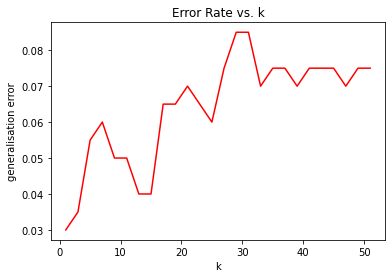

In [4]:
trainModel(X, y, K = np.array(range(1, 53, 2)))

### Questions
 - Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ gives complex models? Why?
 - How does the error develop with the model complexity? Why?

### Answers
 - A lower $k$ will result in better scaling abilities (not too low to avoid overfitting) $\xrightarrow{}$ when $k$ gets too large, we are prone to underfitting
 - The error increases with increasing $k$; the "border"-regions are prone to underfitting therefore the error-rate scales with $k$. 

## Task 3 - Label noise
Flip the sign of the labels of the data randomly with probability of $\frac{1}{5}$. Perform the same steps as before.

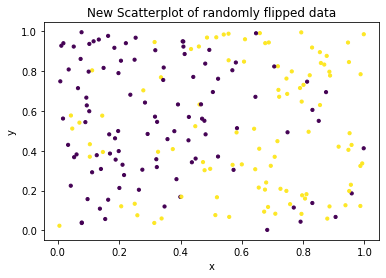

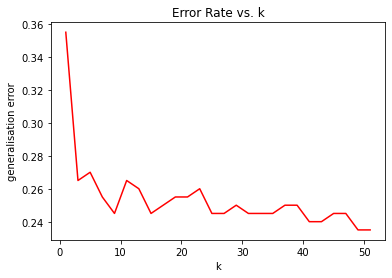

In [5]:
# for reproducibility
np.random.seed(0)

y_noise = y.copy()

for i in range(len(y_noise)):
    if rand() < 1/5: 
        y_noise[i] = -y_noise[i]

plt.scatter(X[:, 0], X[:, 1], s=10, c=y_noise)
plt.title("New Scatterplot of randomly flipped data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

trainModel(X, y_noise, K = np.array(range(1, 53, 2)))

### Questions
 - Which differences do you observe?
 - Which conclusions do you draw from that?

### Answers
 - For small $k$s ($k \leq 5$) we introduce a very high error rate, as to be expected from overfitting. The error averages on around 5\% + the manually introduced 20\%.
 - Since in real-life there will always be some noise, we can conclude that very small $k$s ($k \leq 5$) cannot deal with noise very well (overfitting!); On the other hand, very high $k$s underfit the model and introduce higher generalisation-errors.

## Task 4 - $k$-NN in higher dimensions
Add four random features to the data matrix $X$ which are uniformly distributed between 0 an 1. Perform the same steps as before.

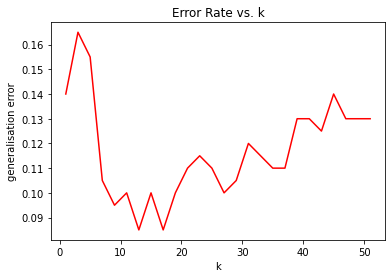

In [6]:
np.random.seed(0)

rFeatures = rand(len(X[:, 0]), 4)
X_new = np.concatenate((X, rFeatures), axis=1)

trainModel(X_new, y, K = np.array(range(1, 53, 2)))

### Questions
 - Try to explain possible changes of the generalization error and the best $k$

### Answers
 - Of course introducing more random dimensions introduces more generalization error. To my surprise the effects were rather small $\xrightarrow{}$ with just 16\% error. 
 - Small $k$s ($k \leq 5 \xrightarrow{}$ overfitting) and big $k$s ($k > 20 \xrightarrow{}$ underfitting) lead to higher error rates. For this case the best $k$s are $13$ and $17$. Calculating the result seeds average around $k \in [11, 19]$.

## Task 5 - Own $k$-NN implementation


In [7]:
# not really necessary but so much more elegant
from functools import reduce

class KNearestNeighborClassifier(object):
    def __init__(self, k: int):
        self.k = k
    
        
    def fit(self, X_train, y_train):
        self.train = []
        for i in range(len(X_train)):
            self.train.append((X_train[i], y_train[i]))
                   
            
    def predict(self, X_test):
        predict = []
        for elem in X_test:
            distances = []
            for record in self.train:
                point, clazz = record[0], record[1]
                distance = multi_dim_euclid(elem, point)
                #distance = (elem[0] - point[0])**2 + (elem[1] - point[1])**2
                distances.append((distance, clazz))
                
            # sort according to distances
            result = sorted(distances, key=lambda tup: tup[0])
            # we are only interested in the first k elements anyways
            result = result[:self.k]
            # we are just interested in classlabels
            result = map(lambda distance_class: distance_class[1], result)
            # sum up all class labels 
            weight = reduce(lambda x, y: x + y, result)
            
            # if sum of all class labels is positive -> majority of k neighbors was class +1
            # if sum of all class labels is positive -> majority of k neighbors was class -1
            # if sum of all class labels == 0 -> we assign class +1
            predict.append(1 if weight >= 0 else -1)
        return predict
    
    
def multi_dim_euclid(p1, p2):
    # We do not need so take the square root to get the actual euclidian distance
    # The order of results stays constant whether you square-root it or not
    # Thus we can save some computational time
    sum = 0
    for i in range(len(p1)):
        sum += (p1[i] - p2[i])**2
    return sum

Original data set - sklearn


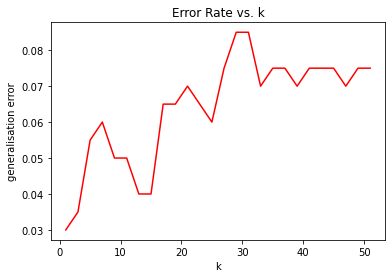

Original data set - my KNearestNeightborClassifier


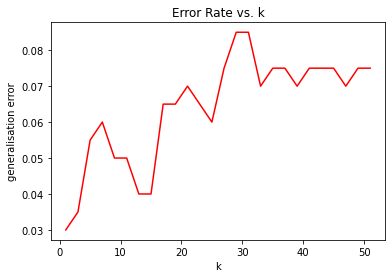

Noisy data set - sklearn


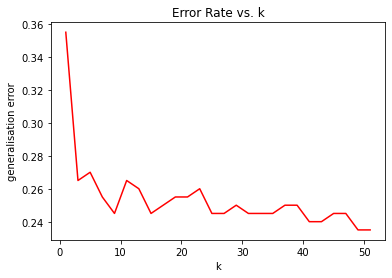

Noisy data set - my KNearestNeightborClassifier


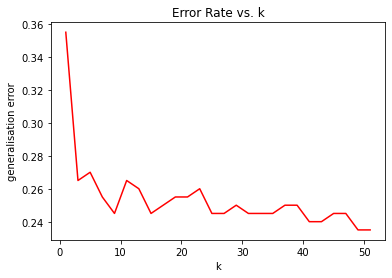

Multi dimensional data set - my KNearestNeightborClassifier


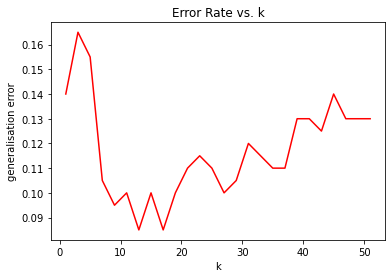

Multi dimensional data set - my KNearestNeightborClassifier


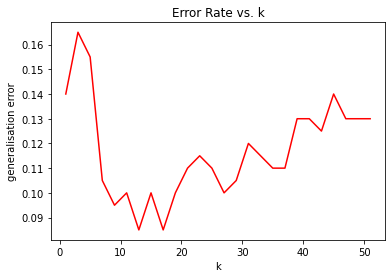

In [8]:
print("Original data set - sklearn")
trainModel(X, y, K = np.array(range(1, 53, 2)), method="default")
print("Original data set - my KNearestNeightborClassifier")
trainModel(X, y, K = np.array(range(1, 53, 2)), method="my KNNC")

print("Noisy data set - sklearn")
trainModel(X, y_noise, K = np.array(range(1, 53, 2)), method="default")
print("Noisy data set - my KNearestNeightborClassifier")
trainModel(X, y_noise, K = np.array(range(1, 53, 2)), method="my KNNC")

print("Multi dimensional data set - my KNearestNeightborClassifier")
trainModel(X_new, y, K = np.array(range(1, 53, 2)), method="default")
print("Multi dimensional data set - my KNearestNeightborClassifier")
trainModel(X_new, y, K = np.array(range(1, 53, 2)), method="my KNNC")